# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 15
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_15D_modisa_3.csv
out_filename: df_chl_out_15D_modisa_4.csv


,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.000000,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.47000
2077,15707,2002-11-01,67.516567,-13.316117,24.136500,0.000146,1000.000000,-15.863733,NaN,0.000074,13.536150,0.158023,-0.801279,0.002436,-2.613278,552.07500
2095,34710,2002-11-01,63.079750,16.525517,17.614183,0.000127,0.001804,-1.195583,28.666317,0.000066,17.411183,0.392572,-0.406080,-0.167135,NaN,550.51700
2101,34721,2002-11-01,67.881250,6.486583,14.737233,0.000121,0.001813,6.646367,29.393383,0.000063,12.702833,0.152538,-0.816623,0.010258,-1.988946,481.64700
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.000000,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.22800
2336,15707,2002-11-16,65.486917,-5.950300,21.719050,0.000135,1000.000000,-18.206700,NaN,0.000070,12.378467,0.154963,-0.809773,-0.003061,NaN,730.53000
2354,34710,2002-11-16,62.155933,37.775033,54.870467,0.000127,0.001738,1.705867,27.485500,0.000064,21.077217,0.552854,-0.257389,0.160282,-0.795115,273.45700
2360,34721,2002-11-16,68.290100,10.951950,12.429300,0.000105,0.001749,-1.591367,29.041267,0.000056,13.955783,0.152553,-0.816579,0.000015,-4.818009,494.47500
2591,10206,2002-12-01,66.049467,6.777450,14.383300,0.007490,1000.000000,-12.568283,NaN,0.001855,11.718717,0.141565,-0.849043,0.001315,-2.881075,660.64700


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

8.656032975899036e-16

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.000000,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.470,-0.000117
2077,15707,2002-11-01,67.516567,-13.316117,24.136500,0.000146,1000.000000,-15.863733,NaN,0.000074,13.536150,0.158023,-0.801279,0.002436,-2.613278,552.075,0.001028
2095,34710,2002-11-01,63.079750,16.525517,17.614183,0.000127,0.001804,-1.195583,28.666317,0.000066,17.411183,0.392572,-0.406080,-0.167135,NaN,550.517,-0.028383
2101,34721,2002-11-01,67.881250,6.486583,14.737233,0.000121,0.001813,6.646367,29.393383,0.000063,12.702833,0.152538,-0.816623,0.010258,-1.988946,481.647,0.004483
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.000000,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.228,0.004277


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    500.000000
mean      -0.030009
std        0.189782
min       -3.227182
25%       -0.018936
50%       -0.001345
75%        0.013129
max        0.062963
Name: chlor_a_logE_rate, dtype: float64

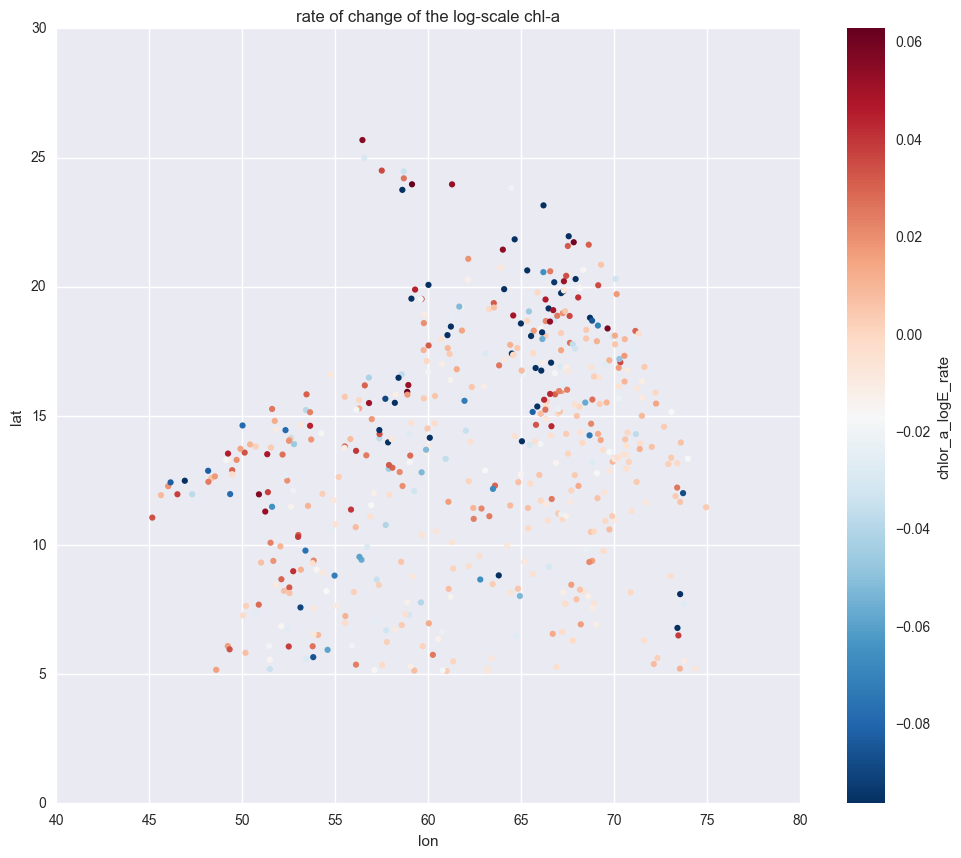

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

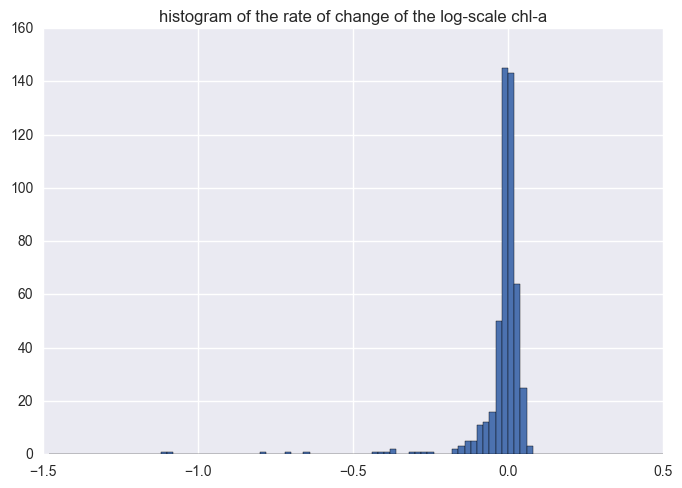

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

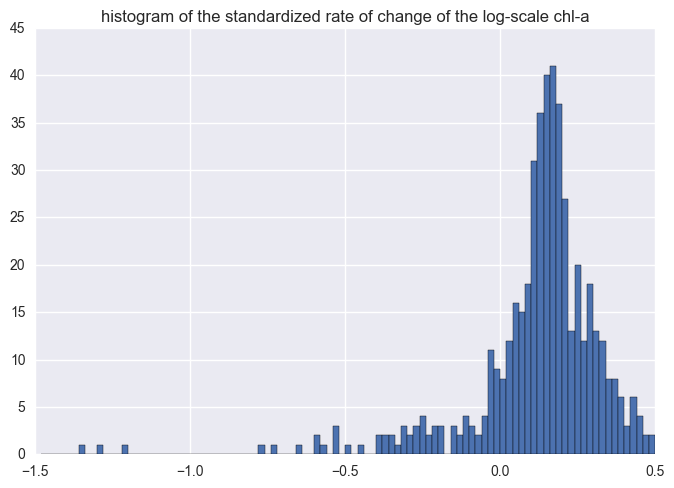

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [4]:
freq = 15
import numpy as np
(np.log(0.141565)-np.log(0.140250))   / freq

0.00062216207751738162

In [10]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:10206, time:2002-12-01"
# (0.141565 - 0.140250) / (freq*0.141565)    == 0.0006192679452312756
#########
# Val 2:
# id:10206, time:2002-12-01"
# (np.log(0.141565)-np.log(0.140250))   / freq == 0.00062216207751738162 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.0,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.470,-0.000117
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.0,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.228,0.004277
2591,10206,2002-12-01,66.049467,6.777450,14.383300,0.007490,1000.0,-12.568283,NaN,0.001855,11.718717,0.141565,-0.849043,0.001315,-2.881075,660.647,0.000619
2850,10206,2002-12-16,64.844550,3.686400,10.204233,0.002841,1000.0,-8.721100,NaN,0.000811,12.433233,0.159126,-0.798257,0.017561,-1.755447,799.905,0.007357
3109,10206,2002-12-31,63.592417,-4.998550,13.272817,0.001646,1000.0,-11.821550,NaN,0.000543,12.299100,0.287051,-0.542041,0.127924,-0.893047,935.974,0.029710


In [11]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.0,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.470,-0.000117
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.0,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.228,0.004277
2591,10206,2002-12-01,66.049467,6.777450,14.383300,0.007490,1000.0,-12.568283,NaN,0.001855,11.718717,0.141565,-0.849043,0.001315,-2.881075,660.647,0.000619
2850,10206,2002-12-16,64.844550,3.686400,10.204233,0.002841,1000.0,-8.721100,NaN,0.000811,12.433233,0.159126,-0.798257,0.017561,-1.755447,799.905,0.007357
3109,10206,2002-12-31,63.592417,-4.998550,13.272817,0.001646,1000.0,-11.821550,NaN,0.000543,12.299100,0.287051,-0.542041,0.127924,-0.893047,935.974,0.029710


In [12]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_15D_modisa_4.csv


,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.0,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.470,-0.000117
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.0,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.228,0.004277
2591,10206,2002-12-01,66.049467,6.777450,14.383300,0.007490,1000.0,-12.568283,NaN,0.001855,11.718717,0.141565,-0.849043,0.001315,-2.881075,660.647,0.000619
2850,10206,2002-12-16,64.844550,3.686400,10.204233,0.002841,1000.0,-8.721100,NaN,0.000811,12.433233,0.159126,-0.798257,0.017561,-1.755447,799.905,0.007357
3109,10206,2002-12-31,63.592417,-4.998550,13.272817,0.001646,1000.0,-11.821550,NaN,0.000543,12.299100,0.287051,-0.542041,0.127924,-0.893047,935.974,0.029710


In [13]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 52 :


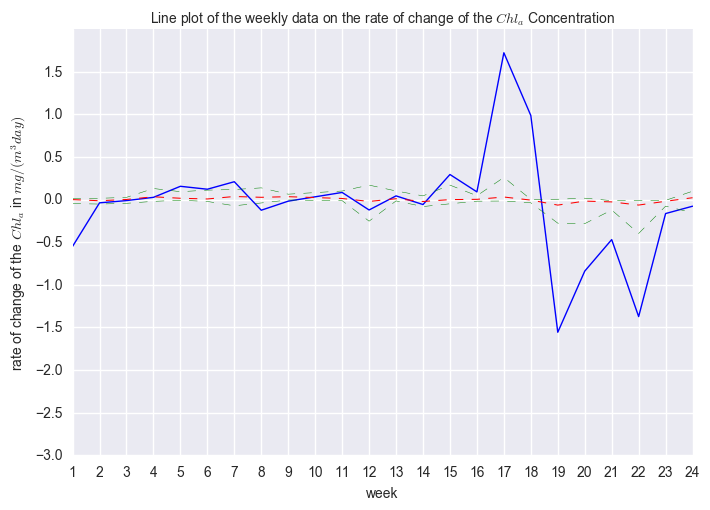

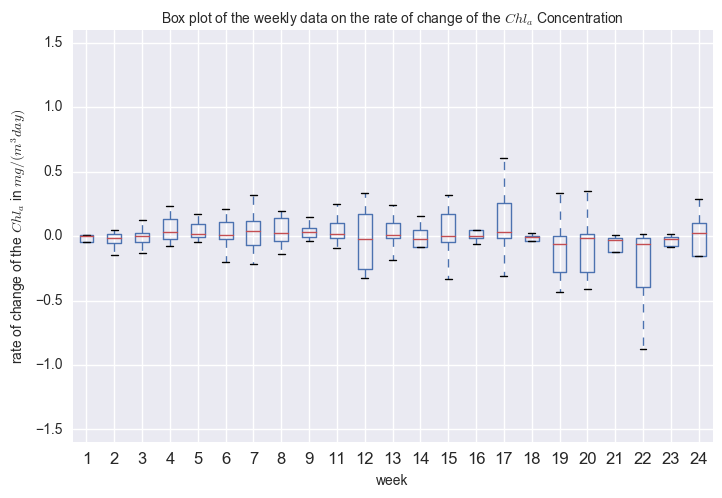

In [14]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

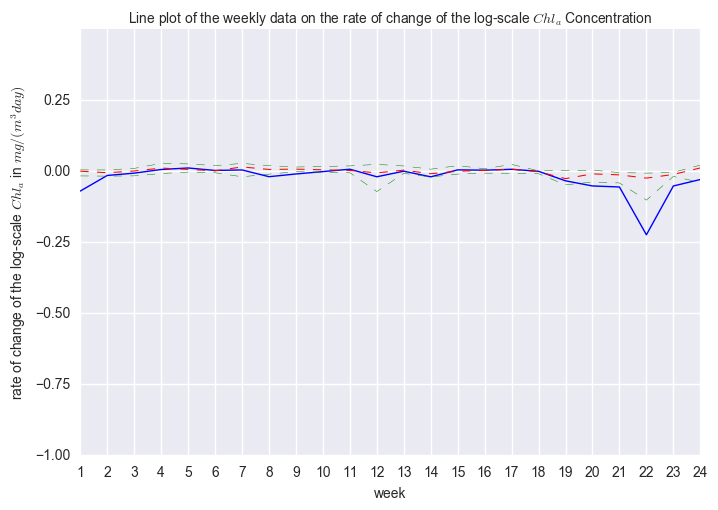

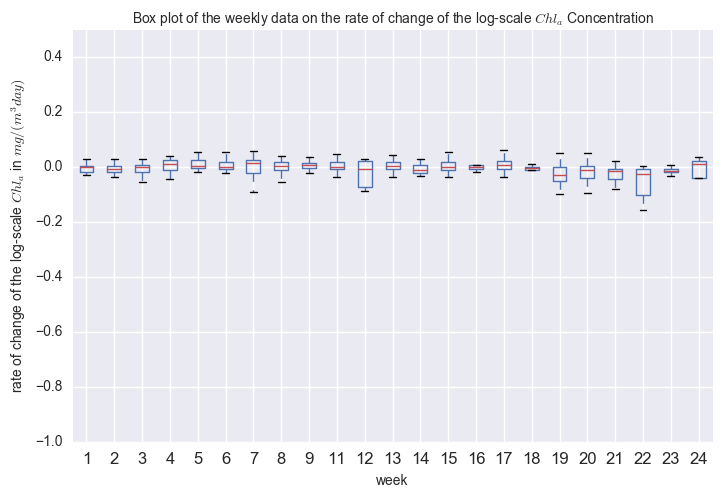

In [15]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [16]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    86.000000
mean     -0.051126
std       0.607245
min      -5.463820
25%      -0.039610
50%       0.005852
75%       0.075876
max       0.447062
Name: chl_rate, dtype: float64


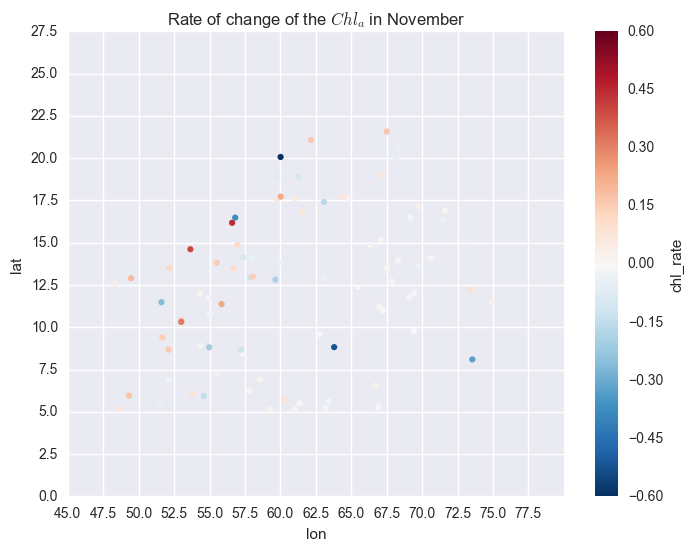



 summary of the Chl_rate 
 count    81.000000
mean      0.072963
std       0.683830
min      -2.964967
25%      -0.017820
50%       0.032429
75%       0.127924
max       3.162658
Name: chl_rate, dtype: float64


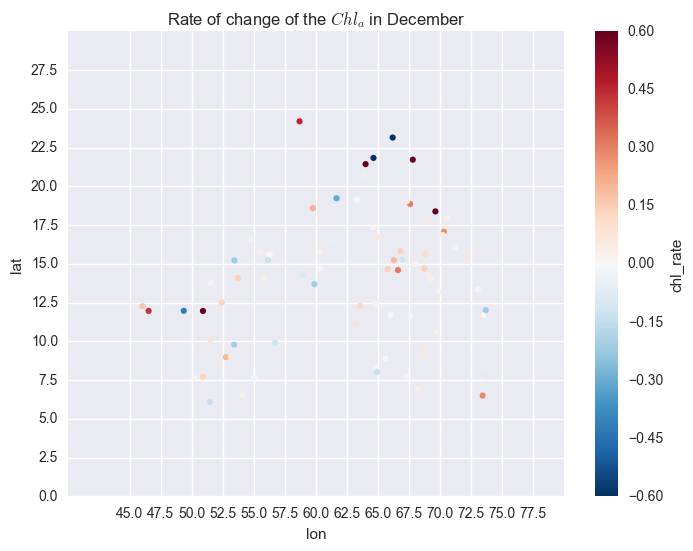



 summary of the Chl_rate 
 count    106.000000
mean       0.123953
std        0.582316
min       -1.129739
25%       -0.021475
50%        0.009342
75%        0.118613
max        4.258058
Name: chl_rate, dtype: float64


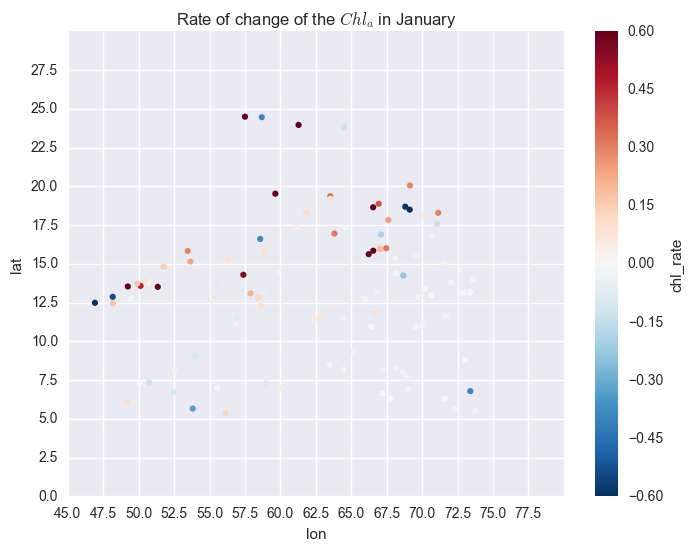



 summary of the Chl_rate 
 count    103.000000
mean       0.440261
std        4.819858
min      -29.010900
25%       -0.081373
50%       -0.005371
75%        0.088618
max       33.742726
Name: chl_rate, dtype: float64


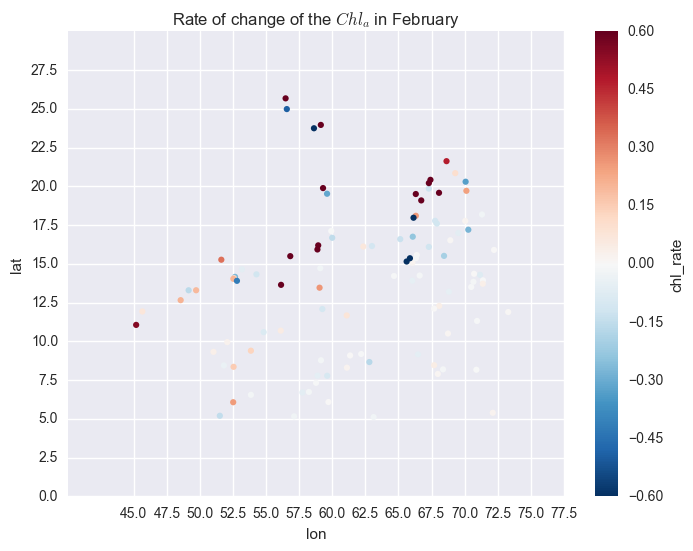



 summary of the Chl_rate 
 count    124.000000
mean      -0.840258
std        2.714265
min      -16.581776
25%       -0.316079
50%       -0.030401
75%       -0.001247
max        5.960847
Name: chl_rate, dtype: float64


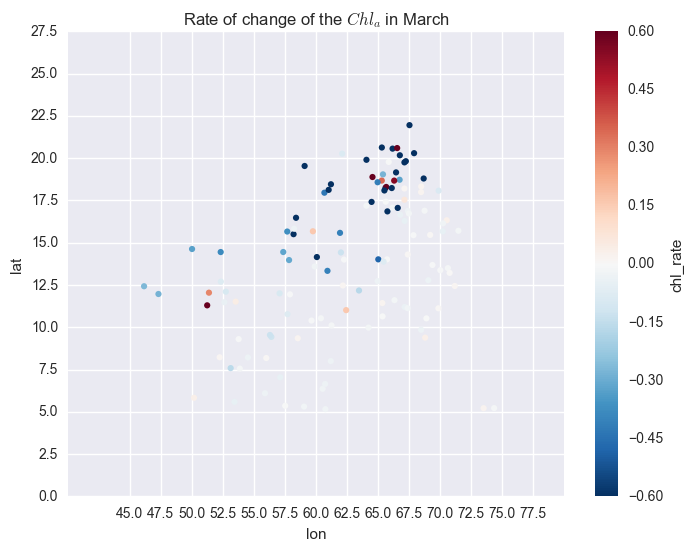

In [17]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [18]:
print("test")

test
